# Un essai simple de k-means avec scikit-learn
On charge les données (deux variables) depuis un fichier CSV.

Fortement inspiré de https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [7]:
# Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)
from sklearn import metrics
from sklearn.cluster import KMeans

In [8]:
# Données : lecture d'un fichier CSV (créé par 00-gen2Ddata.ipynb)
D = pd.read_csv('kms-dataset2d-X.csv', sep=';', header=None)
print(D.describe())
X = np.array(D)

                0           1
count  200.000000  200.000000
mean     3.119035   -0.382835
std      5.395644    3.137519
min     -6.874860   -7.075802
25%      0.311461   -2.922907
50%      4.256648   -0.710461
75%      6.582249    2.412043
max     11.359325    5.753062


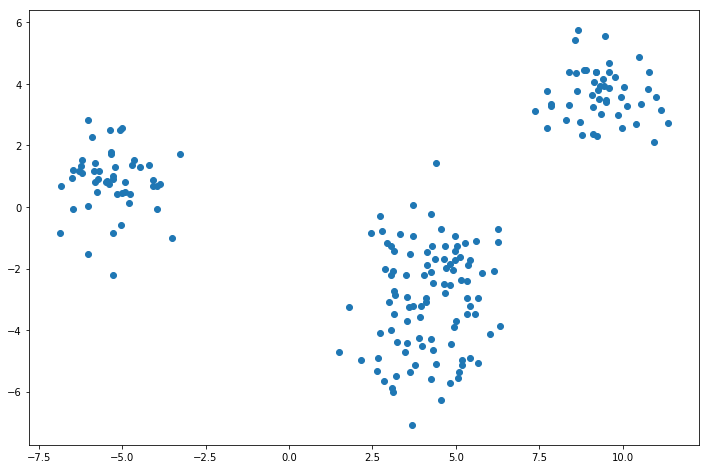

In [9]:
# Affiche les données
# Plot
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# k-means:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# Calcule les valeurs sur les points d'une grille 2D (mesh)
h = .1     # point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Genere une grille de pas h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# labels des points de la grille
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z.shape)

(149, 203)


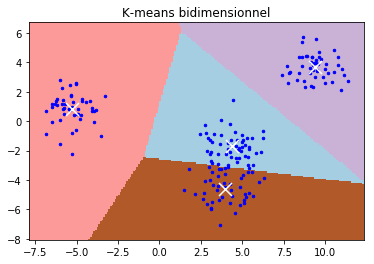

In [6]:
# Affichage:
plt.figure(1)
plt.clf()
# Affiche les points de la grille, comme une image (interpole)
# ce qui donne le fond de couleur
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Ajoute les points:
plt.plot(X[:, 0], X[:, 1], 'b.', markersize=5)

# Affiche les centroïdes:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means bidimensionnel')

plt.show()

# Exercice:

* Modifier les données synthétiques pour ajouter une colonne avec la classe (entier de 0 à 3)
* Faire calculer le taux d'erreur de classification du k-means